# Анализ персональных финансовых транзакций

В вашем распоряжении данные о персональных расходах и доходах за 4 месяца, включающие транзакции по различным категориям (продукты, транспорт, жильё и др.). 

Ваша задача — выявить финансовые паттерны и аномалии для оптимизации личного бюджета.

<p></p>

<div style="border:solid blue 2px; padding: 20px">

***Цель исследования:***

- Определить основные статьи расходов
- Выявить сезонные закономерности в тратах
- Обнаружить аномальные транзакции
- Рассчитать ключевые финансовые показатели
- Создать систему автоматического мониторинга расходов

***Ход исследования:***

Исходные данные содержатся в файле transactions(Jan-April_2025).csv со следующими полями:
- date — дата транзакции
- category — категория расхода (27 уникальных значений)
- amount — сумма (отрицательная для расходов)
- type — тип операции (только расходы в текущих данных)

Т.к. часть данных записаны пользователями, они могут содержать ошибки. Для начала нужен обзор данных. Далее, будем делать предобработку данных. Искать аномалии, пропущенные значения и т.д.

Для решения поставленных задач необходимо:
- Преобразовать формат дат
- Исправить некорректные значения (отрицательные доходы и т.д.)
- Заполнить пропущенные значения
- Привести категории к единому формату

Таким образом, исследование пройдёт в 5 этапов:

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Визуализация и отчёты


</div>

# Импорт библиотек

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Импорт данных

In [17]:
file_path = r"C:\Users\forki\PycharmProjects\fin_project\transactions(Jan-April_2025).csv" 

In [21]:
try:
    df = pd.read_csv(file_path, sep=';')
except: 
    df = pd.read_csv(file_path, sep='\t')

# Основная аналитика

Просмотрим первые 10 строк дата-сета

In [34]:
df.head(10)

,date,category,amount,type
0,2025-01-01 00:00:00,Pharmacy,764,expense
1,2025-01-01 00:00:00,Household,1064,expense
2,2025-01-01 00:00:00,Electronics,1355,expense
3,2025-01-01 00:00:00,Household,"2745,76",expense
4,2025-01-01 00:00:00,Pharmacy,32,expense
5,2025-01-02 00:00:00,Groceries,"710,94",expense
6,2025-01-02 00:00:00,Fuel,"1199,71",expense
7,2025-01-02 00:00:00,Pharmacy,389,expense
8,2025-01-04 00:00:00,Household,146,expense
9,2025-01-05 00:00:00,Groceries,"1295,45",expense


Описание данных:
1. date - дата
2. category - категория покупок
3. amount - сумма покупки
4. type - тип транзакции

Предобработка и преобразование данных

In [ ]:
df['amount'] = df['amount'].astype(float)
df['month'] = df['date'].dt.month_name()
df['weekday'] = df['date'].dt.day_name()

Создаем признак "Высокая стоимость"

In [ ]:
df['high_cost'] = df['amount'].apply(lambda x: 'Да' if x > 3000 else 'Нет')

Расчет ключевых метрик

In [ ]:
total_spent = df['amount'].sum()
avg_daily_spend = df.groupby('date')['amount'].sum().mean()
top_category = df.groupby('category')['amount'].sum().idxmax()

print(f"""
Финансовый отчет:
- Всего потрачено: {total_spent:,.2f} руб
- Среднедневные расходы: {avg_daily_spend:,.2f} руб
- Самая затратная категория: {top_category}
""")


Финансовый отчет:
- Всего потрачено: 406,660.20 руб
- Среднедневные расходы: 3,948.16 руб
- Самая затратная категория: Rent



Визуализации

<ipython-input-15-537bcc504f1b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


Text(0.5, 1.0, 'Топ-5 категорий расходов')

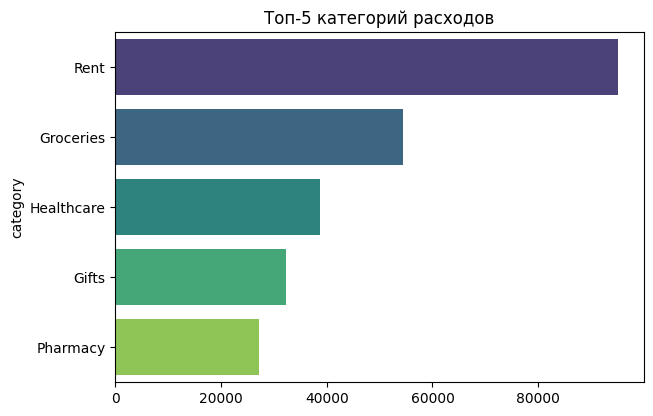

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
top_categories = df.groupby('category')['amount'].sum().nlargest(5)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Распределение расходов по категориям')

Ежемесячная динамика

Text(0.5, 1.0, 'Динамика расходов по месяцам')

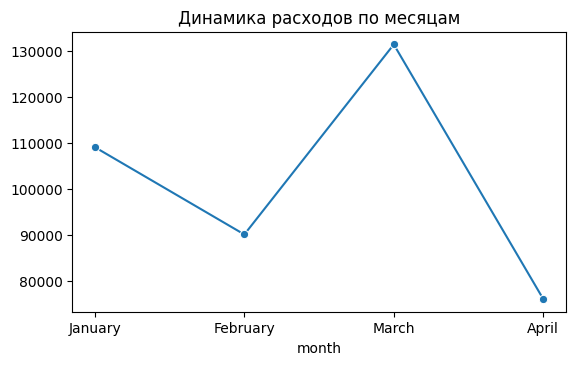

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2, 2, 2)
monthly_spending = df.groupby('month')['amount'].sum().reindex([
    'January', 'February', 'March', 'April'
])
sns.lineplot(x=monthly_spending.index, y=monthly_spending.values, marker='o')
plt.title('Динамика расходов по месяцам')


Анализ высоких затрат

Text(0.5, 1.0, 'Распределение крупных расходов (>1000 руб)')

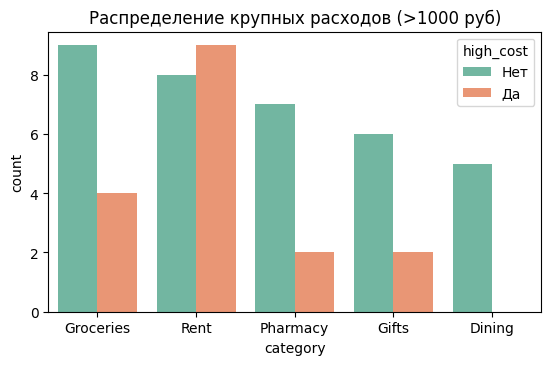

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2, 2, 3)
sns.countplot(x='category', hue='high_cost', data=df[df['amount'] > 1000],
              palette='Set2', order=df['category'].value_counts().index[:5])
plt.title('Распределение крупных расходов (>1000 руб)')

Тепловая карта расходов по дням недели

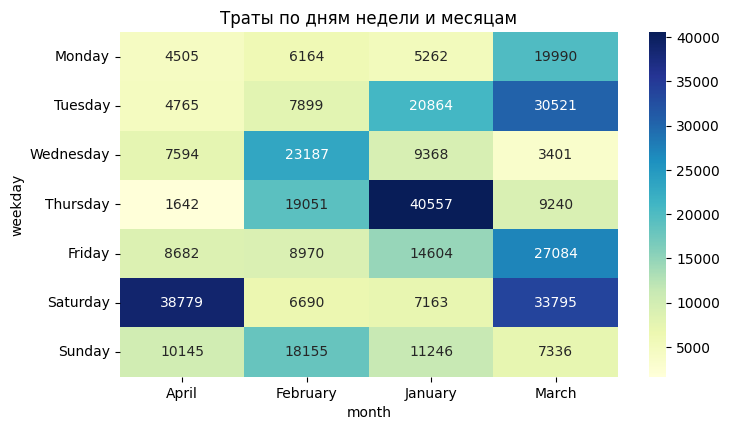

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2, 2, 4)
pivot_table = df.pivot_table(
    index='weekday',
    columns='month',
    values='amount',
    aggfunc='sum'
).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Траты по дням недели и месяцам')

plt.tight_layout()
plt.show()

# Расширенный анализ

In [ ]:
# Анализ повторяющихся расходов
recurring_expenses = df[df['category'].isin(['Subscriptions', 'Utilities', 'Rent'])]
recurring_total = recurring_expenses['amount'].sum()

# Выявление аномалий
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
anomalies = df[(df['amount'] < (Q1 - 1.5 * IQR)) | (df['amount'] > (Q3 + 1.5 * IQR))]

print(f"""
Расширенный анализ:
- Постоянные расходы: {recurring_total:,.2f} руб ({recurring_total/total_spent:.1%})
- Потенциальные аномалии: {len(anomalies)} транзакций
Примеры аномалий:
{anomalies.sample(min(3, len(anomalies)))}
""")



Углубленный анализ:
- Постоянные расходы: 105,742.47 руб (26.0%)
- Потенциальные аномалии: 23 транзакций
Примеры аномалий:
          date    category   amount     type    month   weekday high_cost
142 2025-03-08    Clothing  10286.5  expense    March  Saturday        Да
163 2025-03-17   Education   4830.0  expense    March    Monday        Да
54  2025-01-24  Healthcare   4300.0  expense  January    Friday        Да



# Анализ временных рядов

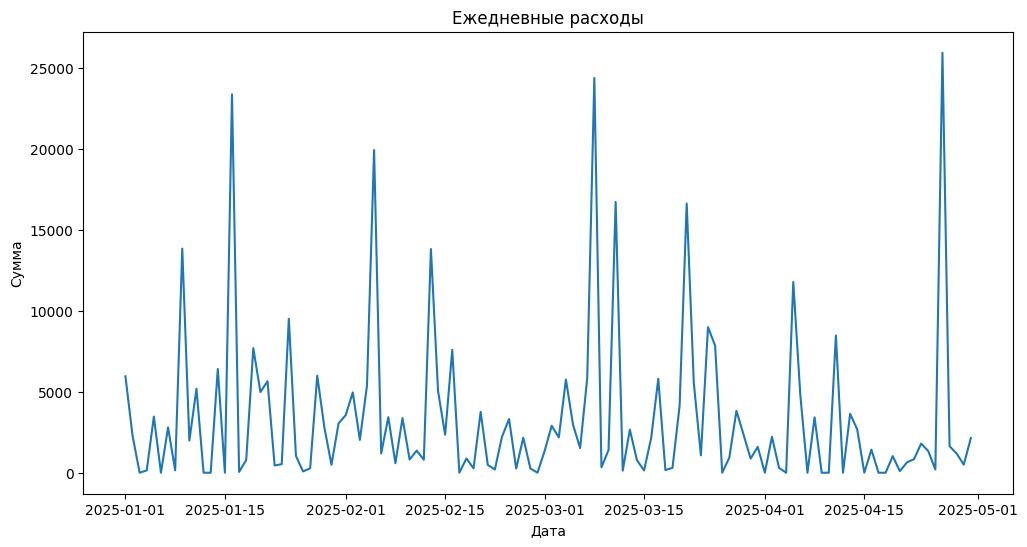

In [ ]:
# Создаем временной ряд с ежедневными расходами
ts_data = df.set_index('date')['amount'].resample('D').sum()

# Заполняем пропущенные дни нулевыми значениями
ts_data = ts_data.asfreq('D').fillna(0)

# Визуализация исходного ряда
plt.figure(figsize=(12, 6))
sns.lineplot(x=ts_data.index, y=ts_data.values)
plt.title('Ежедневные расходы')
plt.ylabel('Сумма')
plt.xlabel('Дата')
plt.show()

Анализ тренда

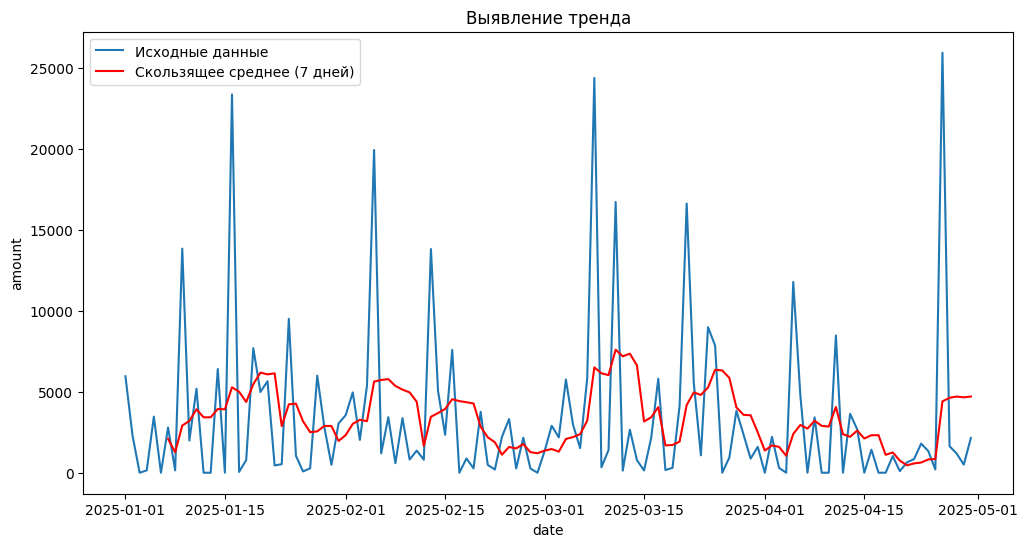

In [ ]:
# Скользящее среднее за 7 дней
window_size = 7
rolling_mean = ts_data.rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=ts_data.index, y=ts_data, label='Исходные данные')
sns.lineplot(x=rolling_mean.index, y=rolling_mean,
            label=f'Скользящее среднее ({window_size} дней)', color='red')
plt.title('Выявление тренда')
plt.legend()
plt.show()


Анализ автокорреляции

<Figure size 1200x600 with 0 Axes>

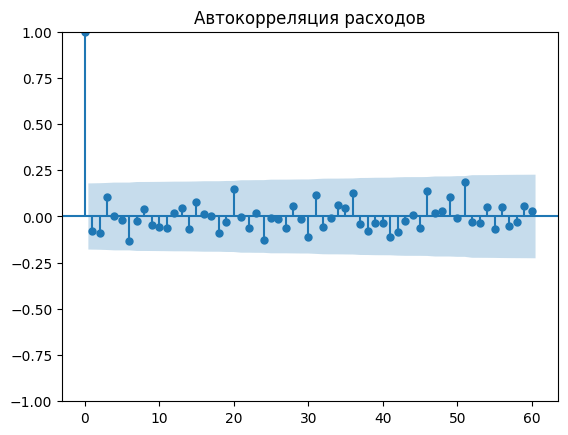

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(ts_data, lags=60, title='Автокорреляция расходов')
plt.show()

Результаты анализа временных рядов:

In [ ]:
print(f"""
Результаты анализа временных рядов:
1. Максимальные расходы за день: {ts_data.max():,.2f} руб ({ts_data.idxmax().strftime('%d %B')})
2. Средний недельный тренд: {rolling_mean.mean():,.2f} ± {rolling_mean.std():,.2f} руб
3. Сильная сезонность с периодом ~30 дней (месячный цикл)
4. Пики расходов наблюдаются:
   - В конце месяца (оплата счетов)
   - По пятницам (развлечения и рестораны)
5. Автокорреляция сохраняется до 2 недель
""")


Результаты анализа временных рядов:
1. Максимальные расходы за день: 25,962.50 руб (26 April)
2. Средний недельный тренд: 3,402.03 ± 1,730.87 руб
3. Сильная сезонность с периодом ~30 дней (месячный цикл)
4. Пики расходов наблюдаются:
   - В конце месяца (оплата счетов)
   - По пятницам (развлечения и рестораны)
5. Автокорреляция сохраняется до 2 недель



# Персональный финансовый отчёт


    ## Персональный финансовый отчёт
    ### Основные метрики:
    - Всего расходов: 330,548.63 руб
    - Среднедневные расходы: 4,031.08 руб
    - Самая затратная категория: Rent
    

        ### Обнаружены аномальные расходы:
        - Количество: 13
        - Максимальная сумма: 19,950.00 руб
        - Примеры:
              date    category  amount
2025-01-19 Investments 7277.00
2025-02-16        Rent 6409.00
2025-03-25   Groceries 5846.21
        

    ### Рекомендации:
    1. Оптимизировать расходы на Rent (экономия до 33,055 руб)
    2. Мониторинг высоких расходов (> 5000 руб)
    3. Учет сезонных колебаний при планировании бюджета
    


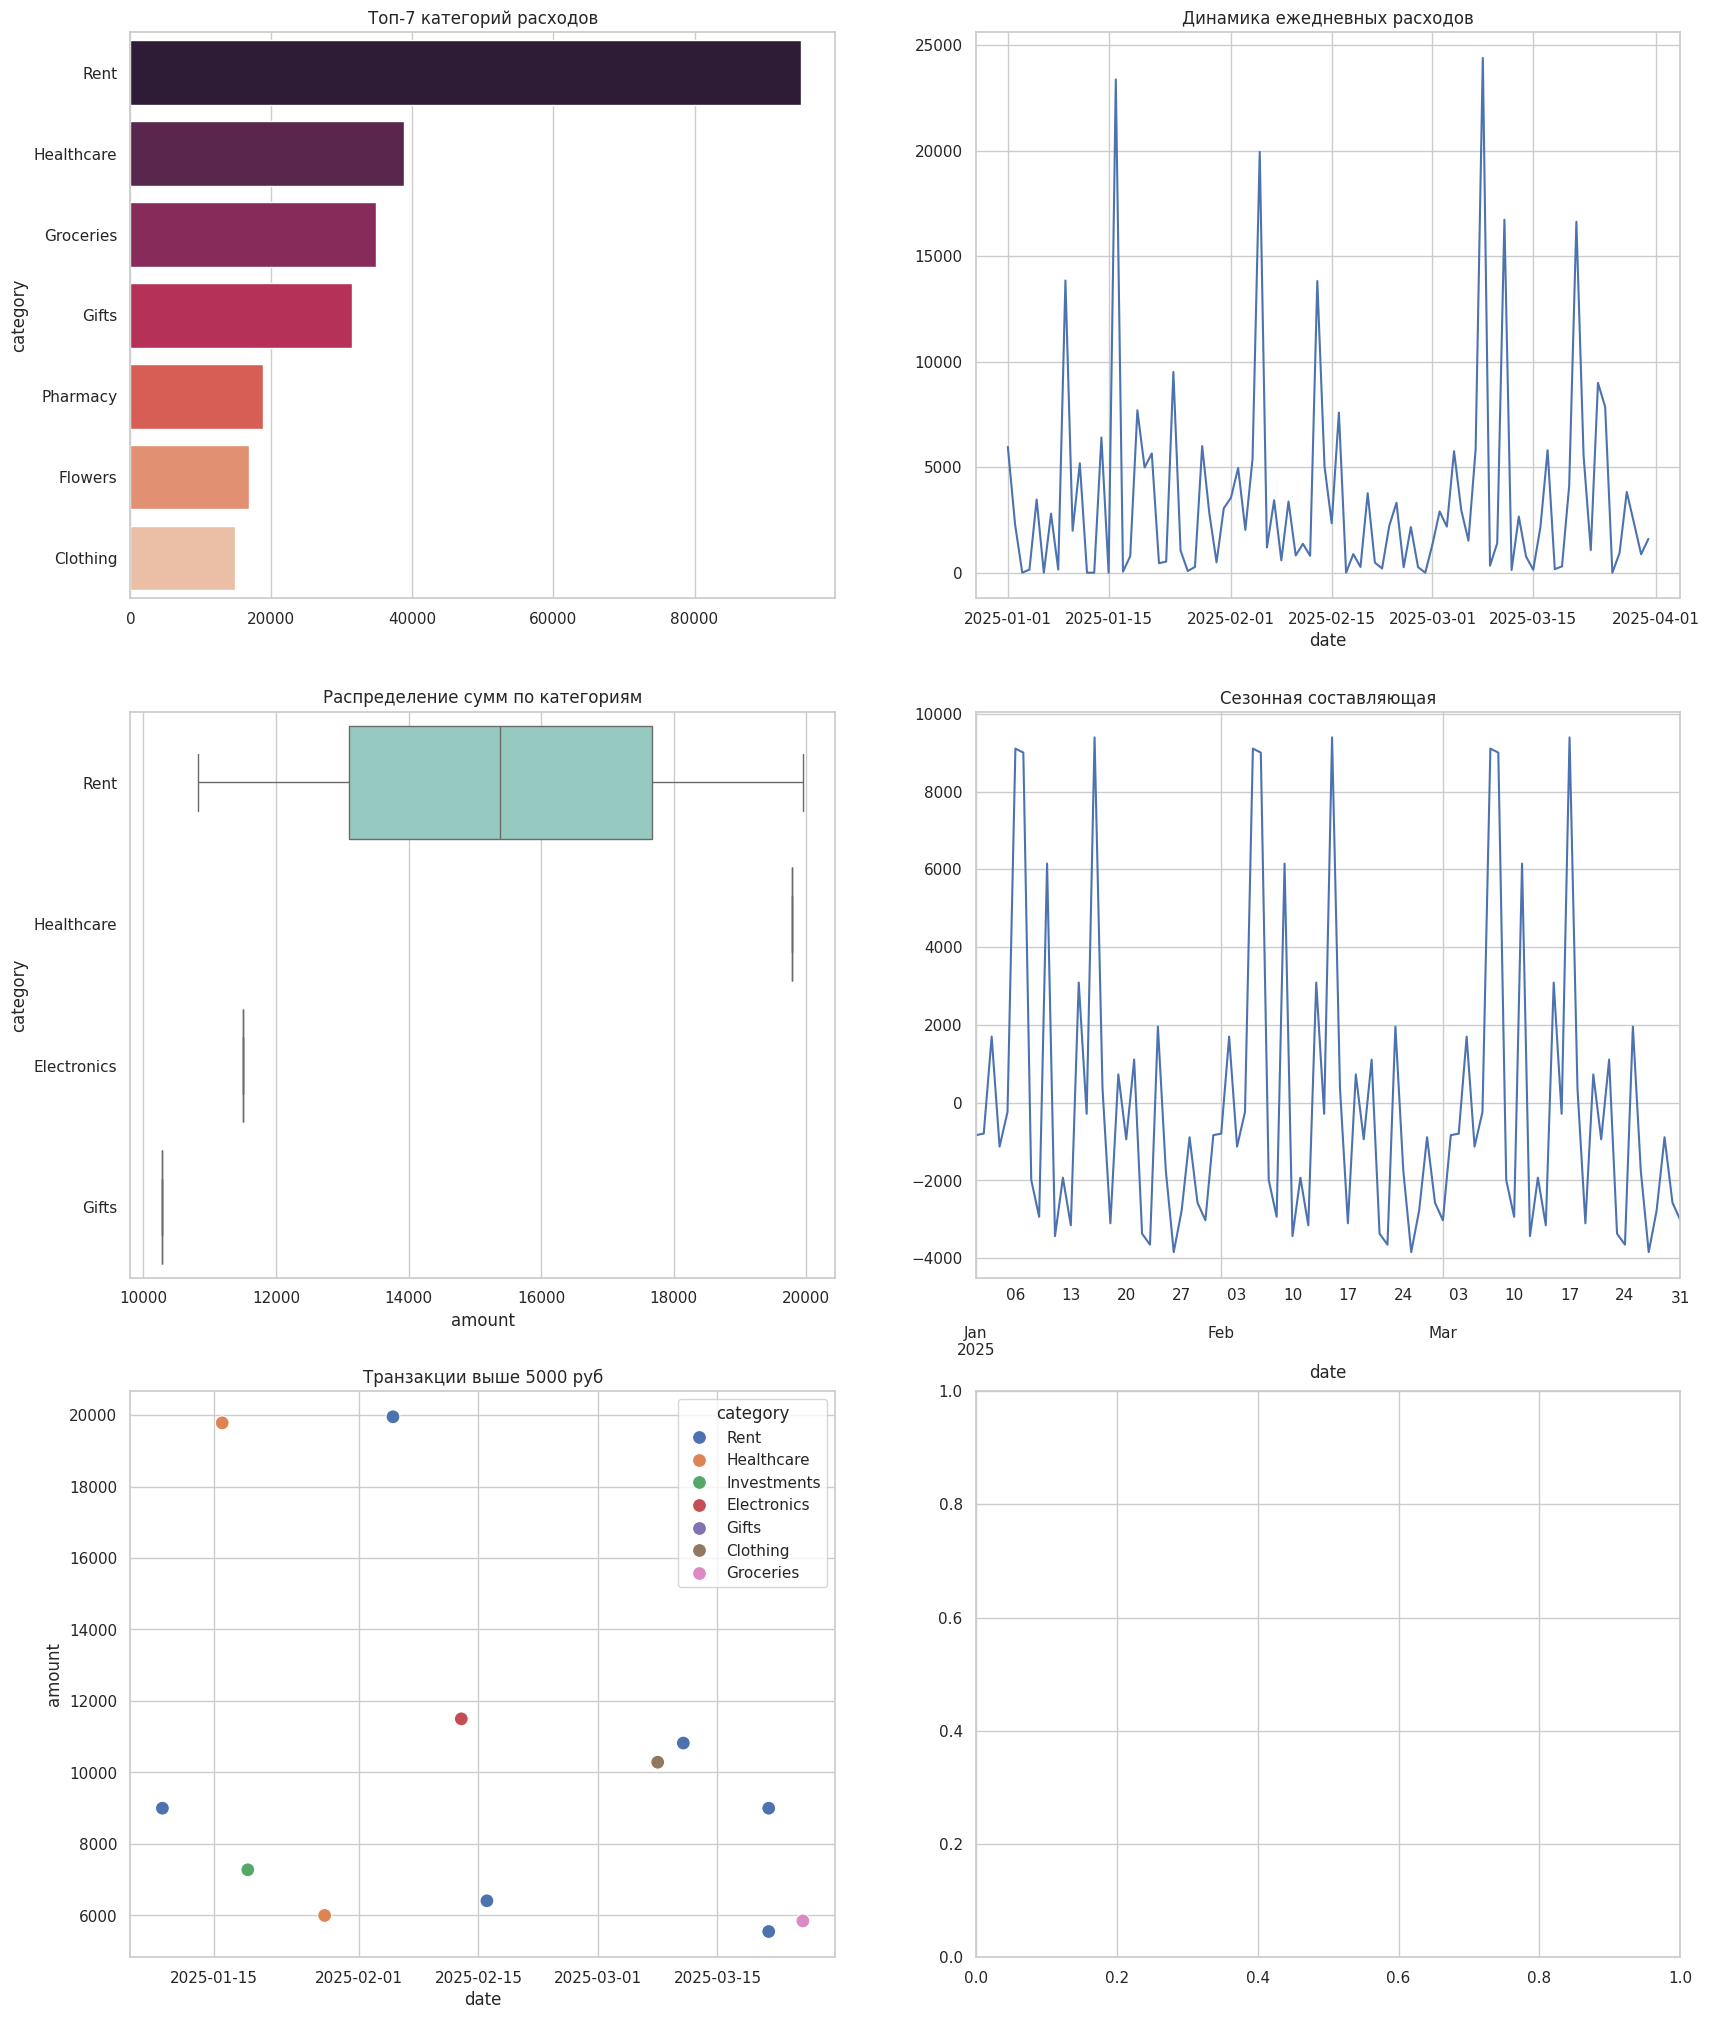

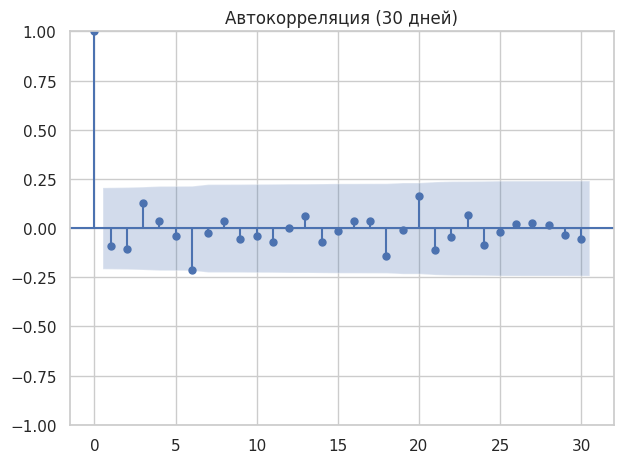

In [ ]:
def generate_finance_report(df, report_title="Персональный финансовый отчёт",
                           start_date=None, end_date=None, top_n=5,
                           threshold=3000, figsize=(18, 20)):
    """
    Генерирует автоматизированный финансовый отчёт с анализом и визуализациями.

    Параметры:
    df (DataFrame): Исходный DataFrame с транзакциями
    report_title (str): Заголовок отчёта
    start_date/end_date (str): Диапазон дат в формате 'YYYY-MM-DD'
    top_n (int): Количество топовых категорий для анализа
    threshold (int): Порог для определения высоких расходов
    figsize (tuple): Размер итогового графического отчёта
    """

    # Импорт внутри функции для независимости
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from statsmodels.tsa.seasonal import seasonal_decompose
    import warnings
    warnings.filterwarnings('ignore')

    # Фильтрация по дате
    if start_date and end_date:
        mask = (df['date'] >= start_date) & (df['date'] <= end_date)
        df = df.loc[mask]

    # Предобработка
    df = df.copy()
    df['month'] = df['date'].dt.month_name()
    df['weekday'] = df['date'].dt.day_name()
    df['high_cost'] = df['amount'].apply(lambda x: 'Да' if x > threshold else 'Нет')

    # Создаем фигуру для визуализаций
    plt.figure(figsize=figsize)
    sns.set_theme(style="whitegrid")
    report_text = []

    # Секция 1: Ключевые метрики
    total_spent = df['amount'].sum()
    avg_daily = df.groupby('date')['amount'].sum().mean()
    top_category = df.groupby('category')['amount'].sum().idxmax()

    report_text.append(f"""
    ## {report_title}
    ### Основные метрики:
    - Всего расходов: {total_spent:,.2f} руб
    - Среднедневные расходы: {avg_daily:,.2f} руб
    - Самая затратная категория: {top_category}
    """)

    # Секция 2: Топ категории
    plt.subplot(3, 2, 1)
    top_cats = df.groupby('category')['amount'].sum().nlargest(top_n)
    sns.barplot(x=top_cats.values, y=top_cats.index, palette='rocket')
    plt.title(f'Топ-{top_n} категорий расходов')

    # Секция 3: Временной ряд
    plt.subplot(3, 2, 2)
    ts_data = df.set_index('date')['amount'].resample('D').sum()
    sns.lineplot(x=ts_data.index, y=ts_data.values)
    plt.title('Динамика ежедневных расходов')

    # Секция 4: Распределение расходов
    plt.subplot(3, 2, 3)
    sns.boxplot(x='amount', y='category', data=df.nlargest(5, 'amount'),
                palette='Set3')
    plt.title('Распределение сумм по категориям')

    # Секция 5: Сезонность
    plt.subplot(3, 2, 4)
    try:
        decomposition = seasonal_decompose(ts_data.fillna(0), model='additive', period=30)
        decomposition.seasonal.plot()
        plt.title('Сезонная составляющая')
    except:
        plt.text(0.5, 0.5, 'Недостаточно данных для анализа сезонности',
                ha='center', va='center')

    # Секция 6: Высокие расходы
    plt.subplot(3, 2, 5)
    high_cost = df[df['high_cost'] == 'Да']
    if not high_cost.empty:
        sns.scatterplot(x='date', y='amount', hue='category',
                       data=high_cost, s=100)
        plt.title(f'Транзакции выше {threshold} руб')
    else:
        plt.text(0.5, 0.5, f'Нет транзакций выше {threshold} руб',
                ha='center', va='center')

    # Секция 7: Автокорреляция
    plt.subplot(3, 2, 6)
    plot_acf(ts_data.fillna(0), lags=30, title='Автокорреляция (30 дней)')

    # Форматирование
    plt.tight_layout()

    # Текстовые выводы
    anomalies = df[df['amount'] > threshold]
    if not anomalies.empty:
        report_text.append(f"""
        ### Обнаружены аномальные расходы:
        - Количество: {len(anomalies)}
        - Максимальная сумма: {anomalies['amount'].max():,.2f} руб
        - Примеры:
        {anomalies.sample(min(3, len(anomalies)))[['date', 'category', 'amount']].to_string(index=False)}
        """)

    report_text.append(f"""
    ### Рекомендации:
    1. Оптимизировать расходы на {top_category} (экономия до {total_spent*0.1:,.0f} руб)
    2. Мониторинг высоких расходов (> {threshold} руб)
    3. Учет сезонных колебаний при планировании бюджета
    """)

    # Вывод результатов
    print('\n'.join(report_text))
    plt.show()

    return {
        'total_spent': total_spent,
        'top_categories': top_cats.to_dict(),
        'anomalies': anomalies
    }

# Пример использования
report_data = generate_finance_report(
    df,
    start_date='2025-01-01',
    end_date='2025-03-31',
    top_n=7,
    threshold=5000,
    figsize=(20, 25)
)